<AxesSubplot:xlabel='datetime'>

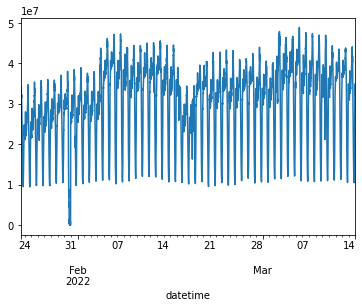

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import json
import os

jsonBuf = open(f"{os.getcwd()}/metrics_02.json", 'r')
obj = json.load(jsonBuf)
arr = [f"{x},{y}" for x, y in zip(obj['MetricDataResults'][0]['Timestamps'], obj['MetricDataResults'][0]['Values'])]
df = pd.read_csv(io.StringIO('\n'.join(arr)), names=('datetime', 'request_count'))

cloned02 = df.copy()
cloned02['datetime'] = pd.to_datetime(cloned02['datetime'], infer_datetime_format=True)
y = pd.Series(cloned02['request_count'].values, index=cloned02['datetime'])
y = y.astype('f')
y.plot()


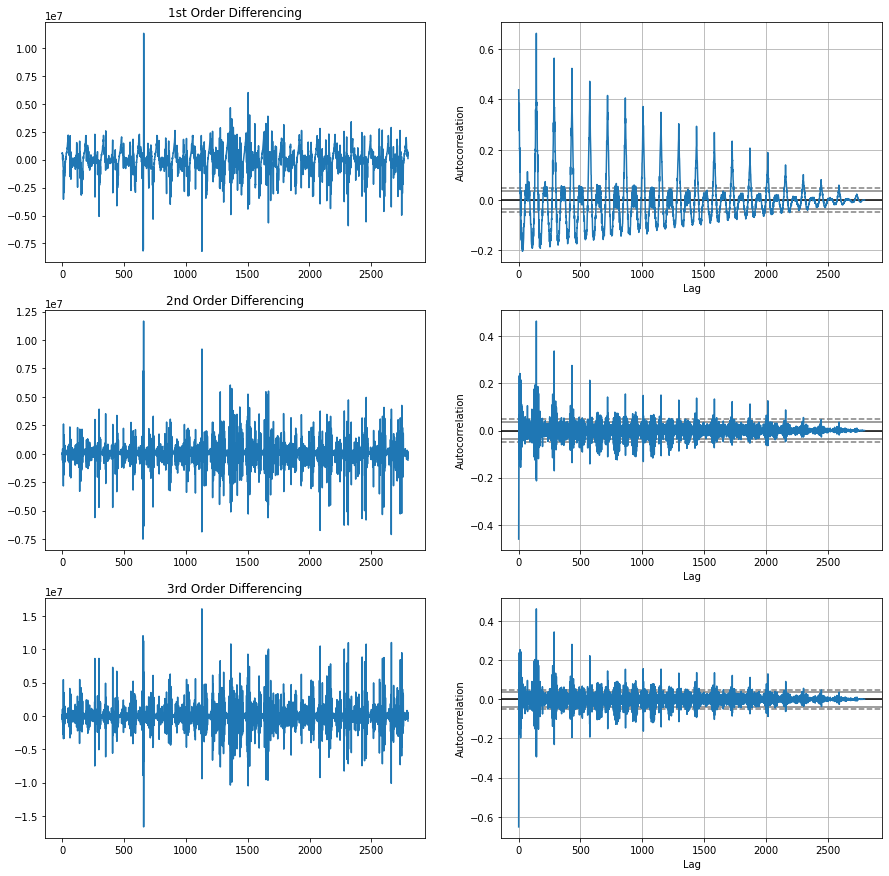

In [50]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot


df_3000 = y[:3000]
df_2800 = df_3000[:2800]

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,15))

# 1st Differencing
axes[0, 0].plot(np.diff(df_2800)); axes[0, 0].set_title('1st Order Differencing')
autocorrelation_plot(np.diff(df_2800), ax=axes[0, 1])

# 2nd Differencing
axes[1, 0].plot(np.diff(np.diff(df_2800))); axes[1, 0].set_title('2nd Order Differencing')
autocorrelation_plot(np.diff(np.diff(df_2800)), ax=axes[1, 1])

# 3rd Differencing
axes[2, 0].plot(np.diff(np.diff(np.diff(df_2800)))); axes[2, 0].set_title('3rd Order Differencing')
autocorrelation_plot(np.diff(np.diff(np.diff(df_2800))), ax=axes[2, 1])

plt.show() 

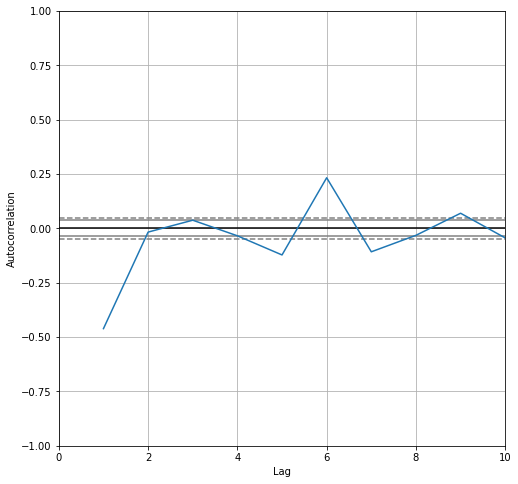

In [22]:
plt.figure(figsize=(8,8))
autocorrelation_plot(np.diff(np.diff(df_2800.to_numpy()))) \
    .set_xlim([0, 10])
plt.show() 

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -10T will be used.
  warnings.warn('No frequency information was'
/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -10T will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52031D+01    |proj g|=  8.50875D-05

At iterate    5    f=  1.52031D+01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     15      1     0     0   3.553D-07   1.520D+01
  F =   15.203120548055772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<BarContainer object of 2797 artists>

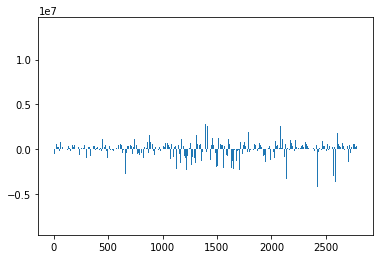

In [58]:
from statsmodels.tsa.arima_model import ARIMA

model_d0 = ARIMA(df_2800, (2,2,1))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid

# 残差
plt.bar(range(len(res_d0[1:])), res_d0[1:])

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 2798
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -42538.331
Method:                       css-mle   S.D. of innovations         969028.709
Date:                Thu, 31 Mar 2022   AIC                          85086.663
Time:                        23:37:08   BIC                          85116.346
Sample:                    03-14-2022   HQIC                         85097.378
                         - 02-23-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -164.9836   4876.405     -0.034      0.973   -9722.562    9392.595
ar.L1.D2.y     0.0481      0.031      1.544      0.123      -0.013       0.109
ar.L2.D2.y     0.0146      0.026      0.560      0.5

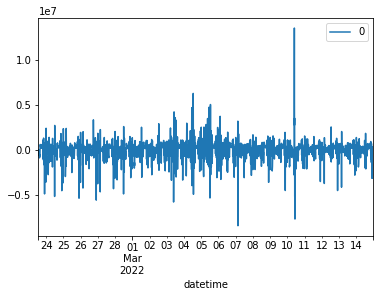

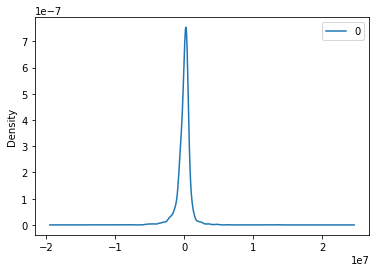

                  0
count  2.798000e+03
mean   5.810867e+02
std    9.692077e+05
min   -8.455686e+06
25%   -3.260650e+05
50%    1.252533e+05
75%    4.194455e+05
max    1.361659e+07


In [59]:
from matplotlib import pyplot
from pandas import DataFrame

print(results_d0.summary())
# plot residual errors
residuals = DataFrame(results_d0.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe()) 

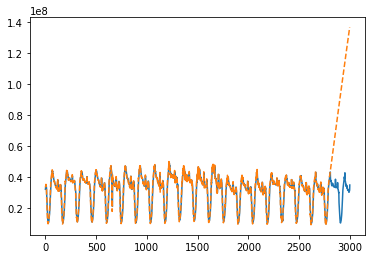

In [60]:
plt.plot(df_3000.values, label='observation')

plt.plot(results_d0.predict(2, len(df_3000), typ='levels').values, '--', label='forecast')